Importing all the required libraries

In [10]:
import google.generativeai as genai
import os
import textwrap
from IPython.display import display
from IPython.display import Markdown

Setting up API Key

In [3]:
os.environ['GOOGLE_API_KEY'] = ''
genai.configure(api_key = os.getenv('GOOGLE_API_KEY'))

to_markdown function for improving the output of the response

In [13]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Finding all the available generation models

In [4]:
#list of available models
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)


models/gemini-pro
models/gemini-pro-vision


Gemini-Pro for text to text generation

In [14]:
model = genai.GenerativeModel('gemini-pro') #text input only model
response = model.generate_content("Explain the use cases of gemini-pro generative AI model")
to_markdown(response.text)

> 1. **Language Translation:**
>    - Translate text from one language to another, preserving the context and tone of the original content.
>    - Assist with real-time language translations during conversations or meetings.
>    - Create multilingual content for websites, apps, or marketing campaigns.
>    - Translate legal documents, technical manuals, or medical reports accurately.
> 
> 2. **Content Creation:**
>    - Generate unique and engaging marketing copy, product descriptions, blog posts, or social media content.
>    - Create compelling story plots, character descriptions, or dialogue for creative writing projects.
>    - Develop educational materials, such as tutorials, lesson plans, or quizzes, based on specific topics.
>    - Generate personalized messages, greeting cards, or invitations for special occasions.
> 
> 3. **Code Generation:**
>    - Write bug-free code snippets, functions, or entire programs from scratch in various programming languages.
>    - Generate test cases, documentation, or comments to improve code readability and maintainability.
>    - Assist with code refactoring, optimization, or debugging.
>    - Develop machine learning algorithms or models for specific tasks.
> 
> 4. **Data Analysis:**
>    - Extract insights from large datasets by performing data cleansing, feature engineering, and exploratory data analysis.
>    - Generate comprehensive reports or visualizations to communicate data-driven insights to stakeholders.
>    - Predict future trends or outcomes using statistical modeling or forecasting techniques.
>    - Identify anomalies, outliers, or patterns in data that may indicate potential issues or opportunities.
> 
> 5. **Customer Service:**
>    - Develop AI-powered chatbots or virtual assistants that can answer customer queries, provide support, or resolve issues.
>    - Generate personalized recommendations for products, services, or content based on customer preferences and past interactions.
>    - Create custom tutorials, FAQs, or knowledge base articles to assist customers in self-resolving common problems.
>    - Analyze customer feedback and identify areas for improvement in products, services, or processes.
> 
> 6. **Healthcare and Medicine:**
>    - Develop AI algorithms for disease diagnosis, treatment planning, or drug discovery.
>    - Analyze medical images, such as X-rays, CT scans, or MRIs, to identify abnormalities or detect diseases.
>    - Generate personalized treatment plans based on a patient's medical history, genetic profile, and current health status.
>    - Assist with medical research by analyzing large datasets, identifying patterns, and developing hypotheses.
> 
> 7. **Financial Services:**
>    - Develop AI models for stock market predictions, risk assessment, or fraud detection.
>    - Generate personalized financial advice based on an individual's financial goals, risk tolerance, and investment portfolio.
>    - Create automated trading algorithms that can execute trades based on predefined criteria or signals.
>    - Analyze financial data, such as market trends, economic indicators, and company reports, to make informed investment decisions.
> 
> 8. **Legal and Regulatory Compliance:**
>    - Review and analyze legal documents, such as contracts, regulations, or case law, to identify key terms, clauses, or potential risks.
>    - Generate legal briefs, pleadings, or memoranda that comply with specific legal requirements and standards.
>    - Assist with legal research by finding relevant precedents, statutes, or case law based on specific search criteria.
>    - Develop AI-powered tools for compliance monitoring, risk management, or regulatory reporting.

Importing Image

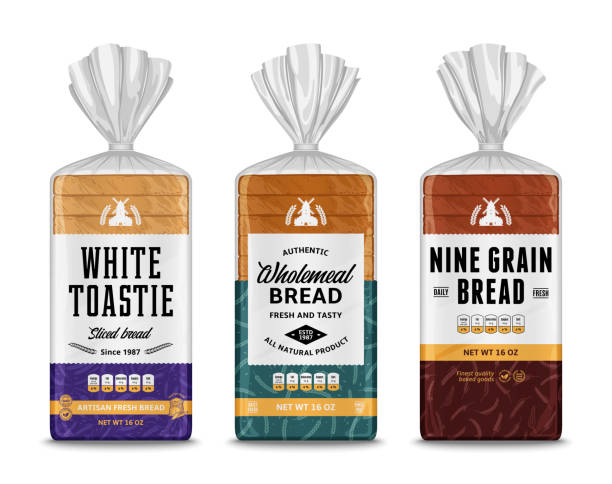

In [37]:
from IPython.display import Image 
pil_img = Image(filename='bread_packing.jpg')
display(pil_img)

Gemini-Pro for Image to Text Generation

In [38]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(pil_img)

to_markdown(response.text)

>  This is a vector illustration of three different types of bread in plastic packaging. The labels are all different colors and have different information on them.

lets provide both text and image to the Gemini-Pro model

In [42]:
response = model.generate_content(["what is the difference between three breads included in picture", pil_img], stream=True)
response.resolve() #utilize this function to process both text & image inputs
to_markdown(response.text)

>  The three breads included in the picture are white, wheat, and nine-grain. White bread is made with refined flour, wheat bread is made with whole wheat flour, and nine-grain bread is made with a combination of nine different grains. White bread is the most common type of bread and is used for a variety of purposes, such as making sandwiches, toast, and French toast. Wheat bread is a healthier option than white bread and is often used for making sandwiches and toast. Nine-grain bread is a very healthy option and is often used for making sandwiches and toast.

Create Chat Conversations & store previous queries from users

In [49]:
#initialize chat conversations
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [50]:
response = chat.send_message('what are the different data science business use cases in Retail Industry',stream= True)
response.resolve()
to_markdown(response.text)

> 1. **Personalized Recommendations**:
>    - Data science algorithms analyze customer purchase history, browsing behavior, and demographics to offer personalized product recommendations, increasing sales and customer satisfaction.
> 
> 2. **Product Assortment Optimization**:
>    - Data science models help retailers determine the optimal product mix for their stores based on historical sales data, market trends, and customer preferences.
> 
> 3. **Demand Forecasting**:
>    - Data science techniques predict future demand for products, enabling retailers to plan inventory levels, allocate resources, and prevent stockouts or overstocking.
> 
> 4. **Customer Segmentation**:
>    - Data science algorithms cluster customers into segments based on their purchase behavior, demographics, and preferences, allowing retailers to target marketing campaigns and promotions more effectively.
> 
> 5. **Pricing Optimization**:
>    - Data science models analyze market data, competitor pricing, and customer behavior to determine the optimal pricing strategies for different products and customer segments, maximizing revenue.
> 
> 6. **Fraud Detection**:
>    - Data science algorithms identify fraudulent transactions in real-time by analyzing customer behavior, transaction patterns, and device information, reducing losses and protecting customer data.
> 
> 7. **Logistics and Supply Chain Optimization**:
>    - Data science models optimize delivery routes, predict shipping times, and manage inventory levels across the supply chain, reducing costs and improving efficiency.
> 
> 8. **Customer Churn Prediction**:
>    - Data science models identify customers at risk of churning based on their purchase history, engagement levels, and other factors, allowing retailers to implement targeted retention strategies.
> 
> 9. **Store Location Optimization**:
>    - Data science algorithms analyze demographic data, traffic patterns, and competitive landscapes to identify optimal locations for new stores or relocations, maximizing customer reach and sales potential.
> 
> 10. **Product Quality Control**:
>     - Data science techniques, such as computer vision and natural language processing, automate product quality inspections, ensuring consistency and reducing manual labor costs.

In [51]:
chat.history #use this function to get the prev chat history

[parts {
   text: "what are the different data science business use cases in Retail Industry"
 }
 role: "user",
 parts {
   text: "1. **Personalized Recommendations**:\n   - Data science algorithms analyze customer purchase history, browsing behavior, and demographics to offer personalized product recommendations, increasing sales and customer satisfaction.\n\n2. **Product Assortment Optimization**:\n   - Data science models help retailers determine the optimal product mix for their stores based on historical sales data, market trends, and customer preferences.\n\n3. **Demand Forecasting**:\n   - Data science techniques predict future demand for products, enabling retailers to plan inventory levels, allocate resources, and prevent stockouts or overstocking.\n\n4. **Customer Segmentation**:\n   - Data science algorithms cluster customers into segments based on their purchase behavior, demographics, and preferences, allowing retailers to target marketing campaigns and promotions more eff

In [52]:
response = chat.send_message("Okay, can you deep dive into personalized recommendations", stream=True)
response.resolve()
to_markdown(response.text)

> Personalized recommendations in the retail industry utilize data science algorithms to analyze customer data and provide tailored product suggestions to each individual customer. This enhances the shopping experience, increases customer satisfaction, and boosts sales.
> 
> Key steps involved in building a personalized recommendation system:
> 
> 1. **Data Collection**:
>    - Gather customer data from various sources, including purchase history, browsing behavior, demographics, loyalty program information, and social media interactions.
> 
> 2. **Data Preprocessing**:
>    - Clean and prepare the data by handling missing values, removing outliers, and transforming categorical variables into numerical representations.
> 
> 3. **Feature Engineering**:
>    - Extract meaningful features from the raw data. Common features include product category, brand, price, customer demographics, and purchase frequency.
> 
> 4. **Model Selection**:
>    - Choose an appropriate recommendation algorithm based on the available data and business requirements. Popular algorithms include collaborative filtering, content-based filtering, and hybrid approaches.
> 
> 5. **Model Training**:
>    - Train the recommendation model using the prepared data. Collaborative filtering algorithms typically require historical customer-product interaction data, while content-based algorithms use product attributes and customer preferences.
> 
> 6. **Model Evaluation**:
>    - Assess the performance of the model using metrics such as precision, recall, andにおすすめの類似度 (RS). Fine-tune the model parameters or try different algorithms if the results are unsatisfactory.
> 
> 7. **Real-Time Recommendations**:
>    - Implement the trained model in a production environment to generate personalized recommendations for customers in real-time. This can be integrated into the retailer's website, mobile app, or in-store displays.
> 
> 8. **Continuous Improvement**:
>    - Monitor the performance of the recommendation system over time and make adjustments as needed. Regularly update the model with new data to ensure that the recommendations remain relevant and accurate.
> 
> By providing customers with personalized product recommendations, retailers can:
> 
> - Increase sales by suggesting products that customers are more likely to be interested in.
> - Improve customer satisfaction by creating a more engaging and personalized shopping experience.
> - Foster customer loyalty by demonstrating an understanding of their individual preferences.
> - Reduce cart abandonment by recommending complementary products that customers may have overlooked.
> - Increase the efficiency of marketing campaigns by targeting customers with relevant offers and promotions.

Generation Config to modify the model parameters

In [55]:
#control model parameters
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        candidate_count=1, # only return one response
        max_output_tokens=256,
        temperature=0.1)
)
to_markdown(response.text)

> In a quaint little town nestled amidst rolling hills, there lived a young girl named Lily. Lily was an adventurous and curious soul, always seeking new experiences and discoveries. One sunny morning, as she was walking through the forest, she stumbled upon a hidden cave. Intrigued, she cautiously entered the cave and found a dusty old backpack lying in a corner.
> 
> As Lily picked up the backpack, she felt a strange tingling sensation run through her fingers. She opened it to find a jumble of colorful objects: a compass that always pointed to her heart's desire, a magnifying glass that revealed hidden secrets, and a pair of shoes that allowed her to run faster than the wind.
> 
> Overjoyed, Lily took the backpack home and began to explore its magical contents. She used the compass to find her way to a hidden waterfall, where she discovered a secret fairy village. With the magnifying glass, she uncovered ancient symbols etched into the rocks, revealing a long-lost treasure map. And with the shoes, she raced through the forest, feeling the wind in her hair and the sun on her face.
> 
> As the days turned into weeks, Lily's adventures became more and more extraordinary. She befriended talking animals, solved riddles that unlocked hidden doors, and even flew